In [32]:
import pandas as pd
import os
import warnings
import matplotlib.pyplot as plt

# Suppress the warning about no default style in the workbook
warnings.simplefilter(action='ignore', category=UserWarning)

# Load the Excel file
def load_excel_file(file_name: str) -> pd.DataFrame:
    current_dir = os.path.join(os.getcwd())
    file_path = os.path.join(current_dir, folder + "\\" + file_name)
    df = pd.read_excel(file_path)
    return df[df['sim_time'] < max_sim_time]

# set the folder name where the Excel files are located
# folder = "150_weeks_improved"
folder = "150_weeks"
max_sim_time = 120_000

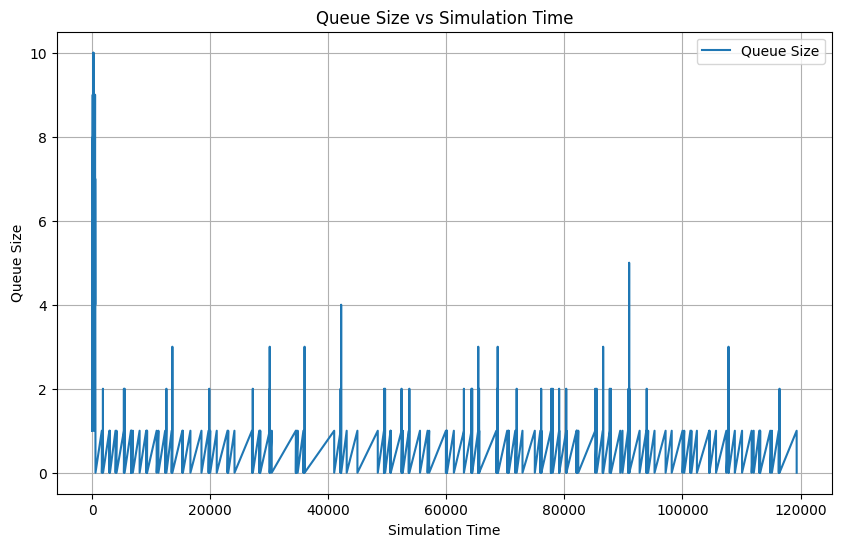

In [69]:
queue_storage = load_excel_file("track_queue_storage.xlsx")

plt.figure(figsize=(10, 6))
plt.plot(queue_storage['sim_time'], queue_storage['storage_queue'], label='Queue Size')
plt.xlabel('Simulation Time')
plt.ylabel('Queue Size')
plt.title('Queue Size vs Simulation Time')
plt.legend()
plt.grid(True)
plt.show()

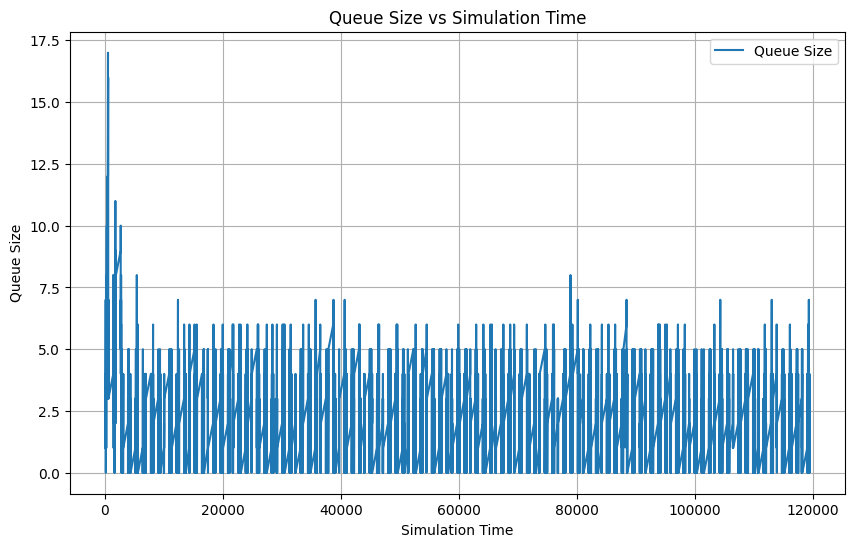

In [70]:
queue_boxing = load_excel_file("track_queue_boxing.xlsx")

plt.figure(figsize=(10, 6))
plt.plot(queue_boxing['sim_time'], queue_boxing['queue_boxing_length'], label='Queue Size')
plt.xlabel('Simulation Time')
plt.ylabel('Queue Size')
plt.title('Queue Size vs Simulation Time')
plt.legend()
plt.grid(True)
plt.show()

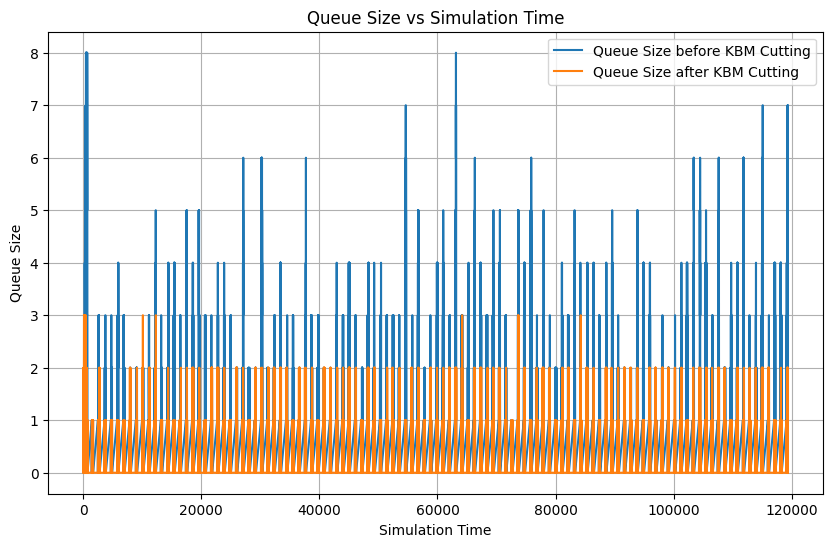

In [71]:
queue_cutting_kbm = load_excel_file("track_queue_cutting_kbm.xlsx")

plt.figure(figsize=(10, 6))
plt.plot(queue_cutting_kbm['sim_time'], queue_cutting_kbm['before_kbm_cutting'], label='Queue Size before KBM Cutting')
plt.plot(queue_cutting_kbm['sim_time'], queue_cutting_kbm['after_kbm_cutting'], label='Queue Size after KBM Cutting')
plt.xlabel('Simulation Time')
plt.ylabel('Queue Size')
plt.title('Queue Size vs Simulation Time')
plt.legend()
plt.grid(True)
plt.show()

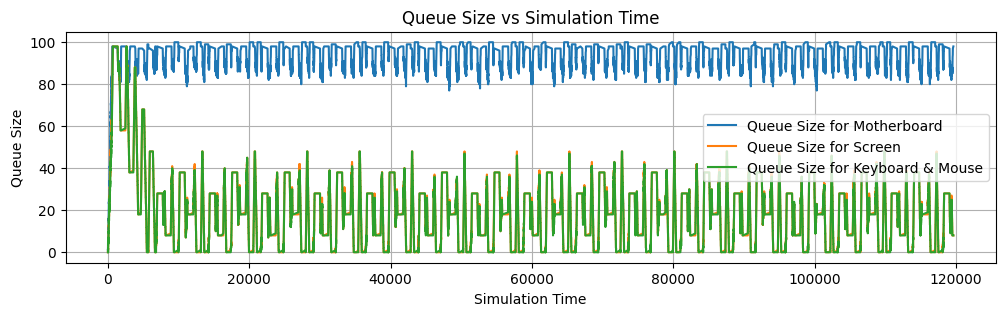

In [19]:
queue_main_assembly_components = load_excel_file("track_queue_main_assembly_components.xlsx")

plt.figure(figsize=(12, 3))
plt.plot(queue_main_assembly_components['sim_time'], queue_main_assembly_components['motherboard_queue'], label='Queue Size for Motherboard')
plt.plot(queue_main_assembly_components['sim_time'], queue_main_assembly_components['screen_queue'], label='Queue Size for Screen')
plt.plot(queue_main_assembly_components['sim_time'], queue_main_assembly_components['kbm_queue'], label='Queue Size for Keyboard & Mouse')
plt.xlabel('Simulation Time')
plt.ylabel('Queue Size')
plt.title('Queue Size vs Simulation Time')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
workbench_utilisation = load_excel_file("track_workbench_utilisation.xlsx")

workbench_utilisation = workbench_utilisation.sort_values(by=['sim_time', 'workbenches_available'], ascending=[True, True]).drop_duplicates(subset=['sim_time'], keep='first')



plt.figure(figsize=(12, 3))
plt.plot(workbench_utilisation['sim_time'], workbench_utilisation['workbenches_available'], label='Workbenches available')
plt.xlabel('Simulation Time')
plt.ylabel('Utilisation')
plt.ylim(0, 2)



FileNotFoundError: [Errno 2] No such file or directory: 'c:\\Users\\Jared\\OneDrive - University of Edinburgh\\Year 4 - Semester 2\\MATH11028 - Simulation\\Simulation-Assignments\\Group Project 2\\Distribution Analysis\\Output Analysis\\150_weeks\\track_workbench_utilisation.xlsx'

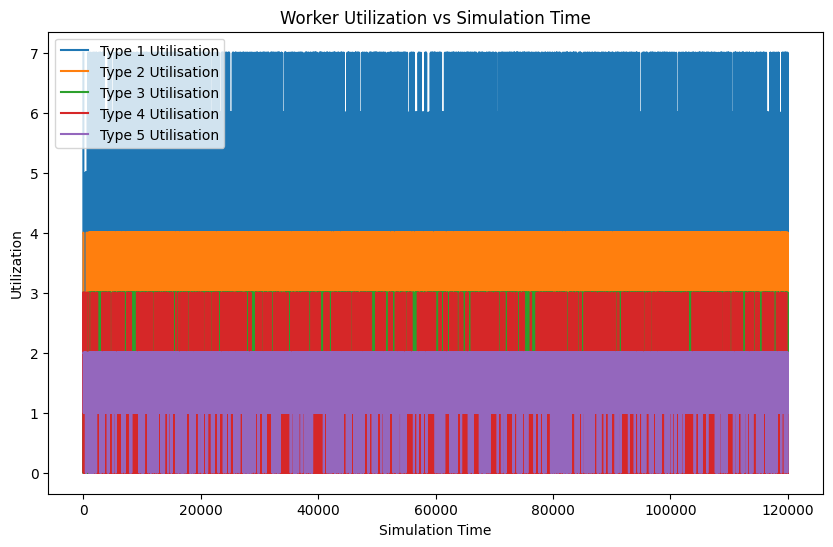

In [205]:
worker_utilization = load_excel_file("track_worker_utilisation.xlsx")
plt.figure(figsize=(10, 6))
plt.step(worker_utilization['sim_time'], worker_utilization['Type 1 utilisation'], label='Type 1 Utilisation')
plt.step(worker_utilization['sim_time'], worker_utilization['Type 2 utilisation'], label='Type 2 Utilisation')
plt.step(worker_utilization['sim_time'], worker_utilization['Type 3 utilisation'], label='Type 3 Utilisation')
plt.step(worker_utilization['sim_time'], worker_utilization['Type 4 utilisation'], label='Type 4 Utilisation')
plt.step(worker_utilization['sim_time'], worker_utilization['Type 5 utilisation'], label='Type 5 Utilisation')
plt.xlabel('Simulation Time')
plt.ylabel('Utilization')
plt.title('Worker Utilization vs Simulation Time')
plt.legend()

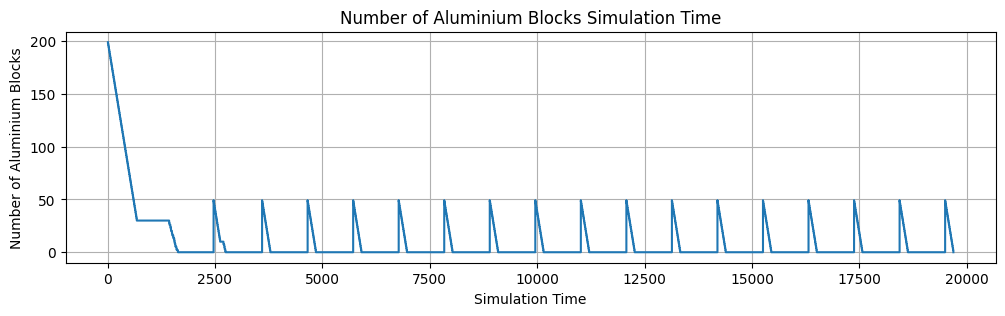

In [33]:
raw_resource_aluminium = load_excel_file("raw_resource_aluminium.xlsx")

# Slice a subset of the data for raw_resource_aluminium
start = min(raw_resource_aluminium['sim_time'])
end = max(raw_resource_aluminium['sim_time'])
# start = 39500
end = 20000
raw_resource_aluminium_slice = raw_resource_aluminium[(raw_resource_aluminium['sim_time'] >= start) & (raw_resource_aluminium['sim_time'] <= end)]

plt.figure(figsize=(12, 3))
plt.step(raw_resource_aluminium_slice['sim_time'], raw_resource_aluminium_slice['aluminium_blocks'], where='post', label='')
plt.xlabel('Simulation Time')
plt.ylabel('Number of Aluminium Blocks')
plt.title('Number of Aluminium Blocks Simulation Time')
# plt.legend()
plt.grid(True)
plt.show()


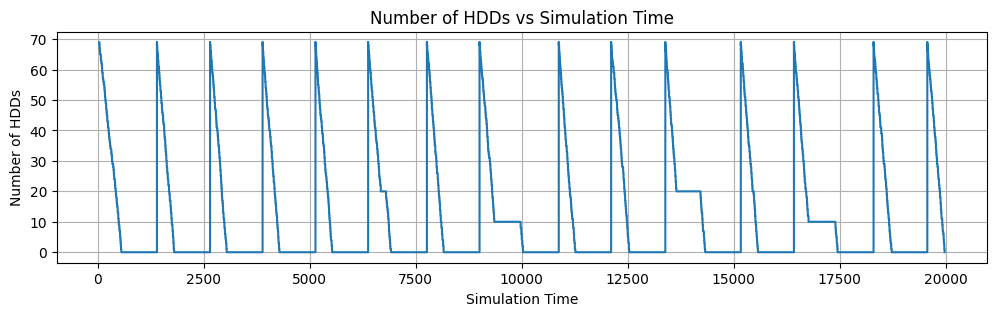

Slope of hdds over time: -0.01622899523702164


In [34]:
raw_resource_hdds = load_excel_file("raw_resource_hdds.xlsx")

# Slice a subset of the data for raw_resource_hdds
start = min(raw_resource_hdds['sim_time'])
end = max(raw_resource_hdds['sim_time'])
# start = 40000
end = 20000
raw_resource_hdds_slice = raw_resource_hdds[(raw_resource_hdds['sim_time'] >= start) & (raw_resource_hdds['sim_time'] <= end)]

plt.figure(figsize=(12, 3))
plt.step(raw_resource_hdds_slice['sim_time'], raw_resource_hdds_slice['hdds'], where='post', label=' ')
plt.xlabel('Simulation Time')
plt.ylabel('Number of HDDs')
plt.title('Number of HDDs vs Simulation Time')
# plt.legend()
plt.grid(True)
plt.show()


# Filter the data for sim_time <= 50000
filtered_data_hdds = raw_resource_hdds_slice[raw_resource_hdds_slice['sim_time'] <= 5000]

# Calculate the slope (change in hdds / change in sim_time)
slope_hdds = (filtered_data_hdds['hdds'].iloc[0] - filtered_data_hdds['hdds'].iloc[-1]) / (filtered_data_hdds['sim_time'].iloc[0] - filtered_data_hdds['sim_time'].iloc[-1])

print(f"Slope of hdds over time: {slope_hdds}")

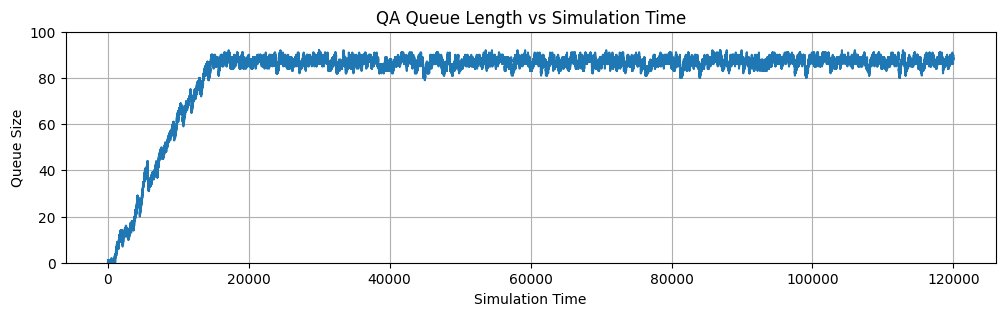

In [29]:
raw_resource_hdds = load_excel_file("track_queue_QA_semi_improved.xlsx")

# Slice a subset of the data for raw_resource_hdds
start = min(raw_resource_hdds['sim_time'])
end = max(raw_resource_hdds['sim_time'])
# start = 40000
# end = 50000
raw_resource_hdds_slice = raw_resource_hdds[(raw_resource_hdds['sim_time'] >= start) & (raw_resource_hdds['sim_time'] <= end)]

plt.figure(figsize=(12, 3))
plt.step(raw_resource_hdds_slice['sim_time'], raw_resource_hdds_slice['queue_QA'], where='post')
plt.xlabel('Simulation Time')
plt.ylabel('Queue Size')
plt.title('QA Queue Length vs Simulation Time')
plt.ylim(0, 100)
plt.grid(True)
plt.show()